In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df=pd.read_csv('Mall_Customers.csv')
print(df.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [7]:
## Data Preprocessing
print(df.isnull().sum())
print(df.info())
print(df.describe())
print(df.shape)

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.00000

In [42]:
df.drop('CustomerID', axis=1, inplace=True)
## axis=1 refers to columns and inplace=True means that the changes will be made to the original dataframe rather than creating a new one.

In [41]:
df.drop('Gender',axis=1,inplace=True)

In [14]:
df.head()
## Customer Id and Gender does not effect annual income and spending score

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


### EDA


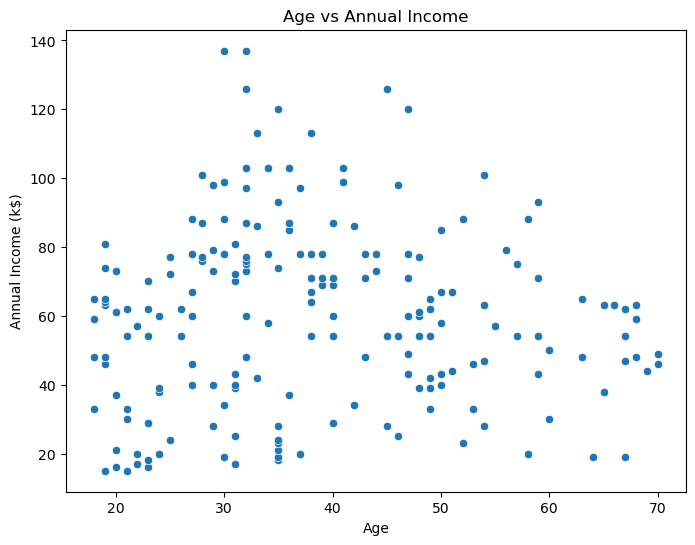

In [24]:
## display age and annual income scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(x='Age',y='Annual Income (k$)',data=df)
plt.title('Age vs Annual Income')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()


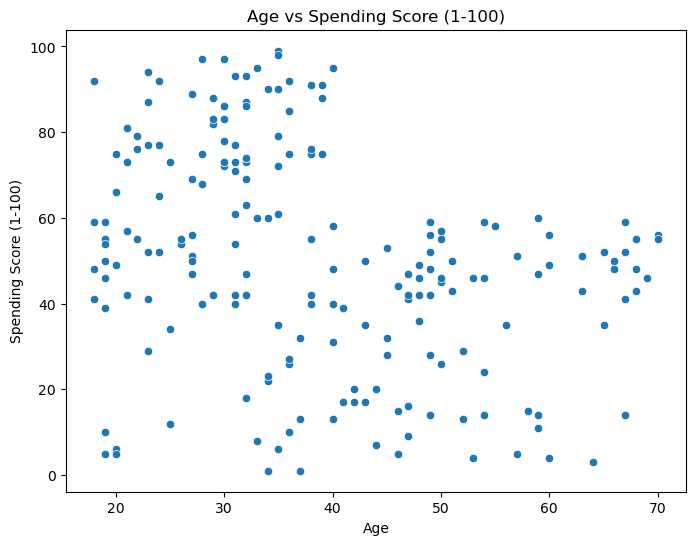

In [25]:
## display age and annual income scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(x='Age',y='Spending Score (1-100)',data=df)
plt.title('Age vs Spending Score (1-100)')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()


### Feature Engineering



In [30]:
## if it follows normal distributioon (bell shape curve,mean=0,deviation=1) then we will us Normalization
## If it left or right skewed distribution then we will use Standardization

In [31]:
## FInding the skewness of data and check whether the data is skewed or not which skewness is there
def skewness_name(skewness):
    if skewness>0:
        return "Right Skewed"
    elif skewness<0:
        return "Left Skewed"
    else:
        return "Normal Distribution"
print("Skewness of Age:",skewness_name(df['Age'].skew()))
print("Skewness of Annual Income (k$):",skewness_name(df['Annual Income (k$)'].skew()))
print("Skewness of Spending Score (1-100):",skewness_name(df['Spending Score (1-100)'].skew()))


Skewness of Age: Right Skewed
Skewness of Annual Income (k$): Right Skewed
Skewness of Spending Score (1-100): Left Skewed


The skewness of Age is Right Skewed, the skewness of Annual Income (k$) is Right Skewed and the skewness of Spending Score (1-100) is Left Skewed. Hence we will use Standardization for all the features.

In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
df = pd.DataFrame(scaled_data, columns=df.columns)
print(df.head())

        Age  Annual Income (k$)  Spending Score (1-100)
0 -1.424569           -1.738999               -0.434801
1 -1.281035           -1.738999                1.195704
2 -1.352802           -1.700830               -1.715913
3 -1.137502           -1.700830                1.040418
4 -0.563369           -1.662660               -0.395980


c:\Users\sushm\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\sushm\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\sushm\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\sushm\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

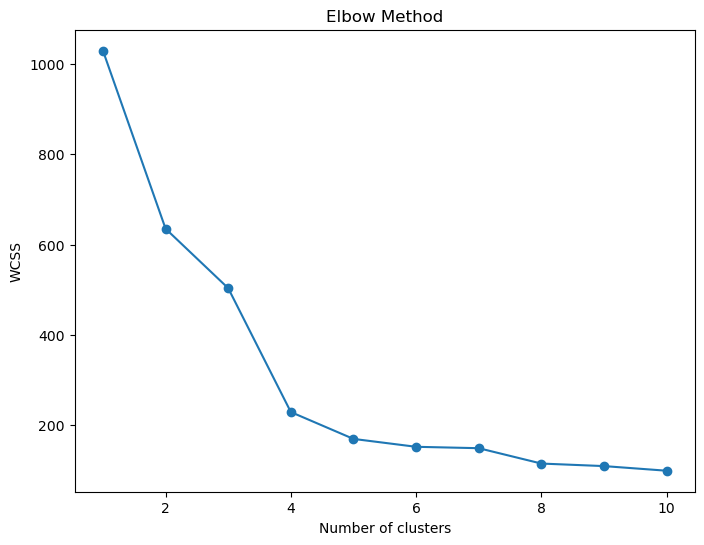

In [51]:
##checks wih elbow Method for optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(8,6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [52]:
## ANother method to find optimal number of clusters
from  sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(df)
df['cluster'] = kmeans.labels_
print(df.head())

c:\Users\sushm\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


        Age  Annual Income (k$)  Spending Score (1-100)  cluster
0 -1.424569           -1.738999               -0.434801        2
1 -1.281035           -1.738999                1.195704        2
2 -1.352802           -1.700830               -1.715913        4
3 -1.137502           -1.700830                1.040418        2
4 -0.563369           -1.662660               -0.395980        2


Text(0, 0.5, 'Annual Income (k$)')

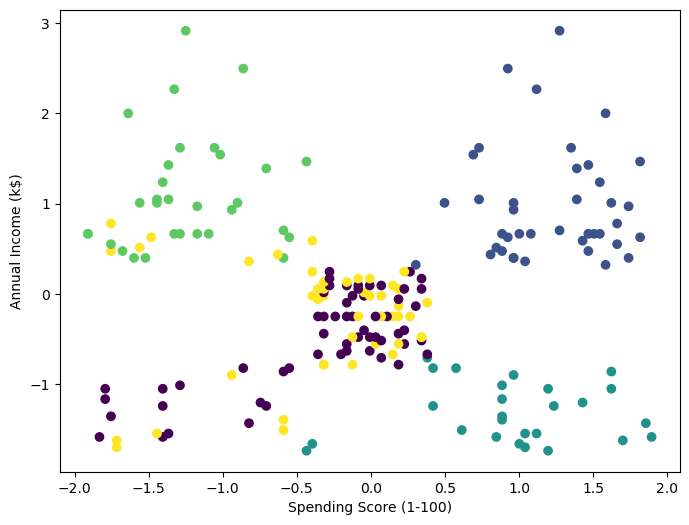

In [55]:
## display the clusters 
plt.figure(figsize=(8,6))
plt.scatter(df['Spending Score (1-100)'], df['Annual Income (k$)'], c=df['cluster'])
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Annual Income (k$)')

In [56]:
df.to_csv('clustered_data.csv', index=False)

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.tree import DecisionTreeClassifier
df=pd.read_csv('clustered_data.csv')
x=df.drop('cluster',axis=1)
y=df['cluster']
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Accuracy:",accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.95
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         5
           2       0.60      1.00      0.75         3
           3       1.00      1.00      1.00        10
           4       1.00      0.83      0.91        12

    accuracy                           0.95        40
   macro avg       0.92      0.97      0.93        40
weighted avg       0.97      0.95      0.95        40

[[10  0  0  0  0]
 [ 0  5  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0 10  0]
 [ 0  0  2  0 10]]
